In [1]:
# import code block
from selenium import webdriver
from bs4 import BeautifulSoup
import zipfile
import pandas as pd
import csv
import time
import random
import matplotlib.pyplot as plt
from urllib.request import urlopen
import re
import string
import numpy as np
import sys
# !{sys.executable} -m pip --upgrade pip
# !{sys.executable} -m pip install descartes
# !{sys.executable} -m pip install geopandas
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import wkt

In [2]:
census = pd.read_csv(r"C:\Users\wjg39\Downloads\MA_CensusTract_Zipcode_merge.csv")

In [3]:
tracts = census['POSTCODE'].unique().tolist()
tractsZips = dict.fromkeys(tracts)

In [4]:
groups = census.groupby('POSTCODE')
for POSTCODE, frame in groups:
    tractsZips[POSTCODE] = frame['NAME10'].values.tolist()


In [5]:
erma = pd.read_csv(r"C:\Users\wjg39\Downloads\ERMA Payments 7.1.20-3.22.21.csv")
erma['PAY_TYPE'] = 'ERMA'
erma['CETRACT'] = ''

raft = pd.read_csv(r"C:\Users\wjg39\Downloads\RAFT Payments 1.1.19-3.22.21.xlsx - Sheet1.csv")
raft['PAY_TYPE'] = 'RAFT'
raft['CETRACT'] = ''

In [6]:
for i,row in erma.iterrows():
    val = erma.at[i, 'Unit ZIP']
    if (erma.at[i,'Unit ZIP'] in tractsZips):
        erma.at[i,'CETRACT'] = tractsZips[val]
    else:
        erma.at[i,'CETRACT'] = np.nan

In [7]:
for i,row in raft.iterrows():
    val = raft.at[i, 'Unit ZIP']
    if (raft.at[i,'Unit ZIP'] in tractsZips):
        raft.at[i,'CETRACT'] = tractsZips[val]
    else:
        raft.at[i,'CETRACT'] = np.nan

In [10]:
erma = erma.append(raft)


In [22]:
erma

,Tenant ID,Check Date,Actual Individual Payment,Unit ZIP,PAY_TYPE,CETRACT
0,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,"[7284.0, 7301.0, 7283.0, 7291.0, 7307.0, 7281...."
1,T82460,7/24/2020,"($2,857.37)",1520.0,ERMA,"[7284.0, 7301.0, 7283.0, 7291.0, 7307.0, 7281...."
2,1500022515,7/29/2020,"$3,250.00",1850.0,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]"
3,1500022515,7/29/2020,"($3,250.00)",1850.0,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]"
4,1500022515,7/30/2020,"($3,250.00)",1850.0,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]"
...,...,...,...,...,...,...
1372,T98506,3/19/2021,"$8,577.00",2124.0,ERMA,"[9803.0, 1008.0, 1006.01, 1005.0, 1004.0, 1003..."
1373,T97039,3/19/2021,"$1,450.00",2215.0,ERMA,"[4008.0, 4003.0, 4002.0, 4001.0, 104.05, 102.0..."
1374,T97039,3/19/2021,"$1,450.00",2215.0,ERMA,"[4008.0, 4003.0, 4002.0, 4001.0, 104.05, 102.0..."
1375,T98340,3/19/2021,"$4,500.00",2119.0,ERMA,"[9803.0, 1205.0, 812.0, 806.01, 805.0, 804.01,..."


In [52]:
erma=erma.explode('CETRACT').reset_index(drop=True)
erma

,Tenant ID,Check Date,Actual Individual Payment,Unit ZIP,PAY_TYPE,CETRACT
0,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284
1,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7301
2,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7283
3,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7291
4,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7307
...,...,...,...,...,...,...
19906,T98514,3/19/2021,"$7,078.24",2121.0,ERMA,819
19907,T98514,3/19/2021,"$7,078.24",2121.0,ERMA,818
19908,T98514,3/19/2021,"$7,078.24",2121.0,ERMA,817
19909,T98514,3/19/2021,"$7,078.24",2121.0,ERMA,815


In [45]:
evictionlabdata = pd.read_csv(r"C:\Users\wjg39\Downloads\tracts.csv")
evictionlabdata.rename(columns={'name':'CETRACT'}, inplace=True)
evictionlabdata

,GEOID,year,CETRACT,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,25001010100,2000,101.0,"Barnstable County, Massachusetts",3433.09,16.28,849.0,46.2,644.01,32722.44,...,0.0,2.88,0.82,NaN,NaN,NaN,NaN,0,0,0
1,25001010100,2001,101.0,"Barnstable County, Massachusetts",3433.09,16.28,842.0,46.2,644.01,32722.44,...,0.0,2.88,0.82,NaN,NaN,NaN,NaN,0,0,0
2,25001010100,2002,101.0,"Barnstable County, Massachusetts",3433.09,16.28,836.0,46.2,644.01,32722.44,...,0.0,2.88,0.82,NaN,NaN,NaN,NaN,0,0,0
3,25001010100,2003,101.0,"Barnstable County, Massachusetts",3433.09,16.28,829.0,46.2,644.01,32722.44,...,0.0,2.88,0.82,31.0,30.0,3.62,3.74,0,0,0
4,25001010100,2004,101.0,"Barnstable County, Massachusetts",3433.09,16.28,822.0,46.2,644.01,32722.44,...,0.0,2.88,0.82,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25136,25027761400,2012,7614.0,"Worcester County, Massachusetts",6567.00,4.19,174.0,8.4,1333.00,126061.00,...,0.0,2.50,0.00,1.0,1.0,0.57,0.57,1,0,0
25137,25027761400,2013,7614.0,"Worcester County, Massachusetts",6567.00,4.19,180.0,8.4,1333.00,126061.00,...,0.0,2.50,0.00,4.0,4.0,2.23,2.23,1,0,0
25138,25027761400,2014,7614.0,"Worcester County, Massachusetts",6567.00,4.19,185.0,8.4,1333.00,126061.00,...,0.0,2.50,0.00,1.0,1.0,0.54,0.54,1,0,0
25139,25027761400,2015,7614.0,"Worcester County, Massachusetts",6567.00,4.19,191.0,8.4,1333.00,126061.00,...,0.0,2.50,0.00,0.0,0.0,0.00,0.00,0,0,0


In [56]:
erma.merge(evictionlabdata,on='CETRACT',how='inner').drop_duplicates()

,Tenant ID,Check Date,Actual Individual Payment,Unit ZIP,PAY_TYPE,CETRACT,GEOID,year,parent-location,population,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284,25027728400,2000,"Worcester County, Massachusetts",4294.43,...,0.02,0.28,0.0,NaN,NaN,NaN,NaN,0,0,0
1,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284,25027728400,2001,"Worcester County, Massachusetts",4294.43,...,0.02,0.28,0.0,6.0,5.0,2.74,3.29,0,0,0
2,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284,25027728400,2002,"Worcester County, Massachusetts",4294.43,...,0.02,0.28,0.0,2.0,2.0,1.10,1.10,1,0,0
3,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284,25027728400,2003,"Worcester County, Massachusetts",4294.43,...,0.02,0.28,0.0,2.0,2.0,1.10,1.10,1,1,0
4,T82460,7/24/2020,"$2,857.37",1520.0,ERMA,7284,25027728400,2004,"Worcester County, Massachusetts",4294.43,...,0.02,0.28,0.0,5.0,5.0,2.74,2.74,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340117,T98349,3/19/2021,"$10,000.00",2474.0,ERMA,3566.01,25017356601,2012,"Middlesex County, Massachusetts",4289.00,...,0.00,0.44,0.0,5.0,5.0,0.77,0.77,0,0,0
340118,T98349,3/19/2021,"$10,000.00",2474.0,ERMA,3566.01,25017356601,2013,"Middlesex County, Massachusetts",4289.00,...,0.00,0.44,0.0,2.0,2.0,0.31,0.31,0,0,0
340119,T98349,3/19/2021,"$10,000.00",2474.0,ERMA,3566.01,25017356601,2014,"Middlesex County, Massachusetts",4289.00,...,0.00,0.44,0.0,7.0,4.0,0.61,1.08,0,0,0
340120,T98349,3/19/2021,"$10,000.00",2474.0,ERMA,3566.01,25017356601,2015,"Middlesex County, Massachusetts",4289.00,...,0.00,0.44,0.0,16.0,11.0,1.69,2.46,0,0,0


In [11]:
def zipConverter(val):
    result = str(val)
    result = result.split('.')[0]
    if len(result) == 4:
        result = '0' + result
    # print(result)
    return str(result)

erma['Unit ZIP'] = erma['Unit ZIP'].apply(zipConverter)
# raft['Unit ZIP'] = raft['Unit ZIP'].apply(zipConverter)

In [12]:
from datetime import date
import datetime

def dateConverter(val):
    vals = val.split('/')
    month = vals[0]
    if len(month) == 1:
        month = ('0' + month)
    day = vals[1]
    if len(day) == 1:
        day = '0' + day 
    year = vals[2]
    result = year + '-' + month + '-' + day
    return date.fromisoformat(result)

In [13]:
erma['Check Date'] = erma['Check Date'].apply(dateConverter)

In [14]:
census['geometry'] = census['geometry'].apply(wkt.loads)

my_geo_df = gpd.GeoDataFrame(census,geometry='geometry')

In [22]:
zipcodes = gpd.GeoDataFrame.from_file(r"C:\Users\wjg39\Downloads\zipcodes_nt\ZIPCODES_NT_POLY.shp")
# fig,ax = plt.subplots(figsize = (15,15))
# zipcodes.plot(ax=ax)

In [23]:
zCounts = pd.DataFrame({'count' : erma.groupby("Unit ZIP")['Actual Individual Payment'].size()}).reset_index()
zCounts=zCounts.rename(columns={'Unit ZIP':'POSTCODE'})

In [24]:
df_test = zipcodes.merge(zCounts, on='POSTCODE',how='left')

Text(0.5, 1.0, 'ERMA/RAFT Payments By Zipcode')

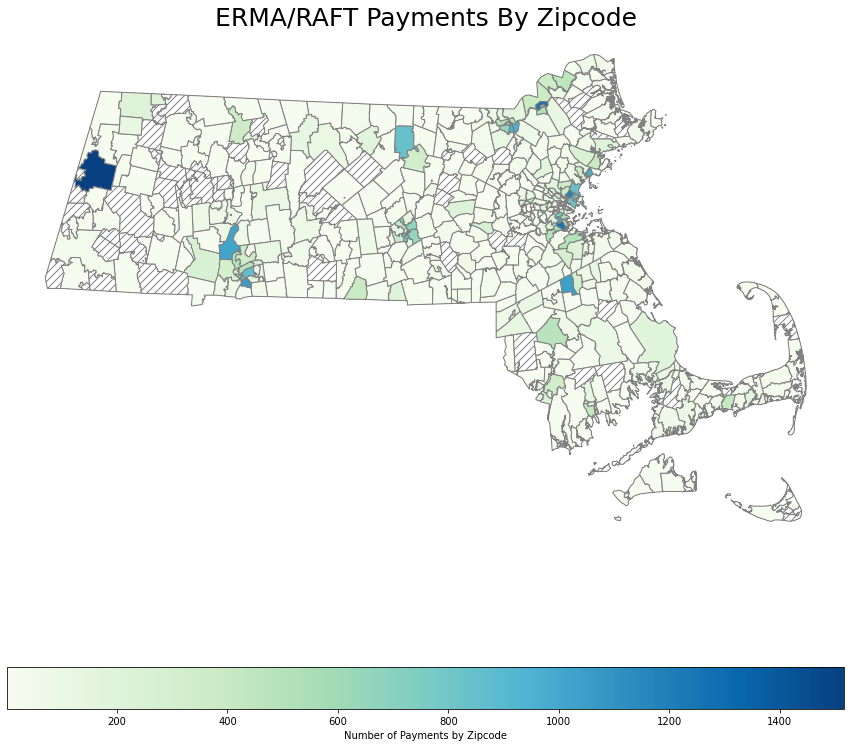

In [26]:
## Total map for payments by zipcode overtime
fig, ax = plt.subplots(figsize=(15,15))
zipcodes.plot(ax=ax, color='black')
vmin, vmax = min(zCounts['count']), max(zCounts['count'])
df_test.plot(column='count',
        cmap='GnBu',
        ax=ax,
        edgecolor='gray',
        legend=True,
        legend_kwds = {'label': "Number of Payments by Zipcode", 'orientation':"horizontal"},
        missing_kwds = {"color":"white","edgecolor":"grey","hatch":"///", "label": "Missing Values"})
ax.axis('off')
ax.set_title('ERMA/RAFT Payments By Zipcode',fontdict={'fontsize': '25', 'fontweight' : '3'})

In [27]:
start_date = date.fromisoformat("2020-07-01")
end_date = date.fromisoformat("2020-07-31")

after_start_date = erma["Check Date"] >= start_date
before_end_date = erma["Check Date"] <= end_date
between_two_dates = after_start_date & before_end_date
july20 = erma.loc[between_two_dates]

In [28]:
july20

,Tenant ID,Check Date,Actual Individual Payment,Unit ZIP,PAY_TYPE,CETRACT,Key Tenant Key
0,T82460,2020-07-24,"$2,857.37",01520,ERMA,"[7284.0, 7301.0, 7283.0, 7291.0, 7307.0, 7281....",NaN
1,T82460,2020-07-24,"($2,857.37)",01520,ERMA,"[7284.0, 7301.0, 7283.0, 7291.0, 7307.0, 7281....",NaN
2,1500022515,2020-07-29,"$3,250.00",01850,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]",NaN
3,1500022515,2020-07-29,"($3,250.00)",01850,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]",NaN
4,1500022515,2020-07-30,"($3,250.00)",01850,ERMA,"[3102.0, 3103.0, 3104.0, 3143.01]",NaN
...,...,...,...,...,...,...,...
22330,T81826,2020-07-14,-2100,01843,RAFT,"[2532.02, 2531.0, 2517.0, 2516.0, 2541.0, 2518...",81826.0
23452,T82510,2020-07-24,-3000,01604,RAFT,"[7391.0, 7317.0, 7325.0, 7373.0, 7392.0, 7322....",82410.0
23453,T82510,2020-07-24,-1000,01604,RAFT,"[7391.0, 7317.0, 7325.0, 7373.0, 7392.0, 7322....",82410.0
23607,T82246,2020-07-17,-4000,02038,RAFT,"[4431.02, 4422.02, 4412.04, 4422.01, 4091.02, ...",82246.0


In [53]:
erma.to_csv(r"C:\Users\wjg39\Downloads\RAFT_ERMA_Mergedv2.csv")